In [92]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [93]:
import seaborn as sns


In [94]:
os.environ['PYTHONHASHSEED']=str(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [95]:
df=pd.read_excel("data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3,NaN,NaN,NaN,NaN,NaN
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0,NaN,NaN,NaN,NaN,NaN
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5,NaN,NaN,NaN,NaN,NaN
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0,NaN,NaN,NaN,NaN,NaN
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0,NaN,NaN,NaN,NaN,NaN


In [96]:
data= df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]


In [97]:
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0


In [98]:
X= data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]


In [99]:
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566


In [100]:
Y= data['X11']


In [101]:
Y.head()

0     4.3
1    10.0
2    17.5
3    31.0
4    34.0
Name: X11, dtype: float64

In [102]:
#We check the number of unique values in each column
a=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
for i in a:
    print(len(X[i].unique()))

18
17
17
8
18
17
9
14
55
52


In [103]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [104]:
# #this code reduces the  above outliers seen. This is done by chaning the values in the box plot based on inter quantile range 
# for i in X.columns:
#     q1=X[i].quantile(0.25)
#     q3=X[i].quantile(0.75)
#     iqr=q3-q1
#     ub=q3 + 1.5*iqr
#     lb=q1 - 1.5*iqr
#     uc=X[i].quantile(0.99)
#     lc=X[i].quantile(0.01)
#     for ind1 in X[i].index:
#         if X.loc[ind1, i] >ub:            
#             X.loc[ind1, i] =uc
#         if X.loc[ind1, i] < lb:
#             X.loc[ind1, i] =lc


In [105]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [107]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [110]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


In [111]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)
from sklearn.model_selection import cross_val_score
RF_accuracies = cross_val_score(estimator = rf, X = X, y = Y, cv = kf,scoring="r2")
print("Mean_RF_Acc : ", RF_accuracies.mean())


Mean_RF_Acc :  0.8073577453485754


# So i just tried a neural network below, it is similar to the neural network given in the machine learning mastery, not really sure what it means but have to work on that

In [113]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import tensorflow as tf


In [114]:
from tensorflow.keras.optimizers import SGD

In [115]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [116]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [117]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [118]:
opt = SGD(lr=0.01, momentum=0.9)
from sklearn.metrics import r2_score

Epoch 1/1500
6/6 [==============================] - 1s 29ms/step - loss: 11.1810 - val_loss: 13.7671
Epoch 2/1500
6/6 [==============================] - 0s 6ms/step - loss: 11.0213 - val_loss: 13.6649
Epoch 3/1500
6/6 [==============================] - 0s 8ms/step - loss: 10.8988 - val_loss: 13.5659
Epoch 4/1500
6/6 [==============================] - 0s 6ms/step - loss: 10.7753 - val_loss: 13.4604
Epoch 5/1500
6/6 [==============================] - 0s 6ms/step - loss: 10.6402 - val_loss: 13.3492
Epoch 6/1500
6/6 [==============================] - 0s 6ms/step - loss: 10.4936 - val_loss: 13.2242
Epoch 7/1500
6/6 [==============================] - 0s 6ms/step - loss: 10.3446 - val_loss: 13.0745
Epoch 8/1500
6/6 [==============================] - 0s 7ms/step - loss: 10.1733 - val_loss: 12.9007
Epoch 9/1500
6/6 [==============================] - 0s 6ms/step - loss: 9.9972 - val_loss: 12.6963
Epoch 10/1500
6/6 [==============================] - 0s 6ms/step - loss: 9.7883 - val_loss: 12.4654


6/6 [==============================] - 0s 7ms/step - loss: 3.8254 - val_loss: 5.8282
Epoch 84/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8413 - val_loss: 5.8289
Epoch 85/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8282 - val_loss: 5.8358
Epoch 86/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8113 - val_loss: 5.8162
Epoch 87/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8167 - val_loss: 5.7966
Epoch 88/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8026 - val_loss: 5.8188
Epoch 89/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8205 - val_loss: 5.8035
Epoch 90/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8462 - val_loss: 5.8917
Epoch 91/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8137 - val_loss: 5.7561
Epoch 92/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.8296 - val_loss: 5.7790
Epoch 93/1500
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 3.6151 - val_loss: 5.5779
Epoch 166/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6770 - val_loss: 5.5556
Epoch 167/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6176 - val_loss: 5.5032
Epoch 168/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.6160 - val_loss: 5.5169
Epoch 169/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6049 - val_loss: 5.5128
Epoch 170/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6032 - val_loss: 5.4985
Epoch 171/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6146 - val_loss: 5.5025
Epoch 172/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6056 - val_loss: 5.5079
Epoch 173/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.6066 - val_loss: 5.4882
Epoch 174/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.6040 - val_loss: 5.4656
Epoch 175/1500


6/6 [==============================] - 0s 6ms/step - loss: 3.4716 - val_loss: 5.2496
Epoch 248/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.4635 - val_loss: 5.2665
Epoch 249/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.4862 - val_loss: 5.2067
Epoch 250/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.4872 - val_loss: 5.2224
Epoch 251/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.4650 - val_loss: 5.2093
Epoch 252/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.4531 - val_loss: 5.2469
Epoch 253/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.4788 - val_loss: 5.2281
Epoch 254/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.4653 - val_loss: 5.2097
Epoch 255/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.4529 - val_loss: 5.1841
Epoch 256/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.4594 - val_loss: 5.2205
Epoch 257/1500


6/6 [==============================] - 0s 6ms/step - loss: 3.3340 - val_loss: 4.9458
Epoch 330/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3162 - val_loss: 4.9657
Epoch 331/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3180 - val_loss: 4.9357
Epoch 332/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3025 - val_loss: 4.9654
Epoch 333/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3347 - val_loss: 4.9641
Epoch 334/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3221 - val_loss: 4.9154
Epoch 335/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.3403 - val_loss: 4.9494
Epoch 336/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3209 - val_loss: 4.9163
Epoch 337/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.2954 - val_loss: 4.9487
Epoch 338/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.3047 - val_loss: 4.9337
Epoch 339/1500


6/6 [==============================] - 0s 6ms/step - loss: 3.1961 - val_loss: 4.6540
Epoch 412/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2523 - val_loss: 4.6657
Epoch 413/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2189 - val_loss: 4.6528
Epoch 414/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2127 - val_loss: 4.6544
Epoch 415/1500
6/6 [==============================] - 0s 5ms/step - loss: 3.2062 - val_loss: 4.6854
Epoch 416/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2230 - val_loss: 4.7086
Epoch 417/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2628 - val_loss: 4.7025
Epoch 418/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2062 - val_loss: 4.7112
Epoch 419/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.1927 - val_loss: 4.6744
Epoch 420/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.2178 - val_loss: 4.7049
Epoch 421/1500


6/6 [==============================] - 0s 6ms/step - loss: 3.0536 - val_loss: 4.5587
Epoch 494/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.0733 - val_loss: 4.5192
Epoch 495/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.0690 - val_loss: 4.5360
Epoch 496/1500
6/6 [==============================] - 0s 16ms/step - loss: 3.0808 - val_loss: 4.5203
Epoch 497/1500
6/6 [==============================] - 0s 41ms/step - loss: 3.0866 - val_loss: 4.5069
Epoch 498/1500
6/6 [==============================] - 0s 39ms/step - loss: 3.0801 - val_loss: 4.5332
Epoch 499/1500
6/6 [==============================] - 0s 34ms/step - loss: 3.0593 - val_loss: 4.5451
Epoch 500/1500
6/6 [==============================] - 0s 23ms/step - loss: 3.0863 - val_loss: 4.5105
Epoch 501/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.0709 - val_loss: 4.5540
Epoch 502/1500
6/6 [==============================] - 0s 8ms/step - loss: 3.0914 - val_loss: 4.5237
Epoch 503/

Epoch 575/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9802 - val_loss: 4.4505
Epoch 576/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9782 - val_loss: 4.4058
Epoch 577/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9655 - val_loss: 4.4414
Epoch 578/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9665 - val_loss: 4.3979
Epoch 579/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9741 - val_loss: 4.4458
Epoch 580/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.9782 - val_loss: 4.4010
Epoch 581/1500
6/6 [==============================] - 0s 6ms/step - loss: 3.0345 - val_loss: 4.4665
Epoch 582/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.9887 - val_loss: 4.3805
Epoch 583/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.9782 - val_loss: 4.4193
Epoch 584/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.9692 - val_loss: 4.4621


Epoch 657/1500
6/6 [==============================] - 0s 10ms/step - loss: 2.8892 - val_loss: 4.3924
Epoch 658/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.8864 - val_loss: 4.3130
Epoch 659/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.8656 - val_loss: 4.2997
Epoch 660/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.8765 - val_loss: 4.3307
Epoch 661/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.8917 - val_loss: 4.2778
Epoch 662/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.8885 - val_loss: 4.2657
Epoch 663/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.8876 - val_loss: 4.3937
Epoch 664/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9114 - val_loss: 4.3040
Epoch 665/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.9014 - val_loss: 4.3298
Epoch 666/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.8818 - val_loss: 4.2587

Epoch 739/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.8340 - val_loss: 4.1871
Epoch 740/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7963 - val_loss: 4.1606
Epoch 741/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.8069 - val_loss: 4.1930
Epoch 742/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7990 - val_loss: 4.1766
Epoch 743/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.8021 - val_loss: 4.2068
Epoch 744/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7984 - val_loss: 4.2096
Epoch 745/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.8206 - val_loss: 4.1910
Epoch 746/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7889 - val_loss: 4.2047
Epoch 747/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7972 - val_loss: 4.1590
Epoch 748/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.7836 - val_loss: 4.1594


Epoch 821/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6944 - val_loss: 4.1130
Epoch 822/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6890 - val_loss: 4.0683
Epoch 823/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.6918 - val_loss: 4.0728
Epoch 824/1500
6/6 [==============================] - 0s 7ms/step - loss: 2.6811 - val_loss: 4.1116
Epoch 825/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.6970 - val_loss: 4.0669
Epoch 826/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.6878 - val_loss: 4.0909
Epoch 827/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7246 - val_loss: 4.0550
Epoch 828/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7536 - val_loss: 4.1680
Epoch 829/1500
6/6 [==============================] - 0s 7ms/step - loss: 2.7466 - val_loss: 4.0592
Epoch 830/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.7224 - val_loss: 4.1556


Epoch 903/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6148 - val_loss: 3.9231
Epoch 904/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6057 - val_loss: 3.9665
Epoch 905/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6183 - val_loss: 3.8981
Epoch 906/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6249 - val_loss: 3.9868
Epoch 907/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6088 - val_loss: 3.9412
Epoch 908/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.5900 - val_loss: 3.9390
Epoch 909/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6078 - val_loss: 3.9330
Epoch 910/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6476 - val_loss: 3.8957
Epoch 911/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6256 - val_loss: 3.9712
Epoch 912/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.6184 - val_loss: 3.9295


Epoch 985/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.5835 - val_loss: 3.7762
Epoch 986/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.5397 - val_loss: 3.8172
Epoch 987/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.6004 - val_loss: 3.7506
Epoch 988/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.5167 - val_loss: 3.7784
Epoch 989/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.4865 - val_loss: 3.7982
Epoch 990/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.4755 - val_loss: 3.7255
Epoch 991/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.5195 - val_loss: 3.7383
Epoch 992/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.5071 - val_loss: 3.7024
Epoch 993/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.4911 - val_loss: 3.7484
Epoch 994/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.5075 - val_loss: 3.8269


6/6 [==============================] - 0s 6ms/step - loss: 2.4211 - val_loss: 3.6626
Epoch 1067/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3920 - val_loss: 3.6072
Epoch 1068/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.4076 - val_loss: 3.6829
Epoch 1069/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.4331 - val_loss: 3.6356
Epoch 1070/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.4106 - val_loss: 3.5604
Epoch 1071/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.4237 - val_loss: 3.6000
Epoch 1072/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3787 - val_loss: 3.6055
Epoch 1073/1500
6/6 [==============================] - 0s 10ms/step - loss: 2.3891 - val_loss: 3.6229
Epoch 1074/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3960 - val_loss: 3.6262
Epoch 1075/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.4143 - val_loss: 3.5941
Epoch

6/6 [==============================] - 0s 6ms/step - loss: 2.3427 - val_loss: 3.5151
Epoch 1148/1500
6/6 [==============================] - 0s 10ms/step - loss: 2.3521 - val_loss: 3.5861
Epoch 1149/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3313 - val_loss: 3.5544
Epoch 1150/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3543 - val_loss: 3.5328
Epoch 1151/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3566 - val_loss: 3.5972
Epoch 1152/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.3492 - val_loss: 3.5545
Epoch 1153/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3513 - val_loss: 3.4918
Epoch 1154/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3618 - val_loss: 3.5191
Epoch 1155/1500
6/6 [==============================] - 0s 9ms/step - loss: 2.3581 - val_loss: 3.5425
Epoch 1156/1500
6/6 [==============================] - 0s 10ms/step - loss: 2.3224 - val_loss: 3.5234
Epoc

6/6 [==============================] - 0s 6ms/step - loss: 2.3070 - val_loss: 3.5534
Epoch 1229/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.3397 - val_loss: 3.4700
Epoch 1230/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.3780 - val_loss: 3.5065
Epoch 1231/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.3362 - val_loss: 3.5897
Epoch 1232/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2897 - val_loss: 3.4689
Epoch 1233/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2768 - val_loss: 3.4837
Epoch 1234/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2829 - val_loss: 3.4490
Epoch 1235/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2470 - val_loss: 3.4856
Epoch 1236/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2893 - val_loss: 3.4873
Epoch 1237/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2755 - val_loss: 3.4389
Epoch 

6/6 [==============================] - 0s 8ms/step - loss: 2.3090 - val_loss: 3.4013
Epoch 1310/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2825 - val_loss: 3.4448
Epoch 1311/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2723 - val_loss: 3.3688
Epoch 1312/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.3280 - val_loss: 3.4901
Epoch 1313/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.3153 - val_loss: 3.3370
Epoch 1314/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2557 - val_loss: 3.5195
Epoch 1315/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2986 - val_loss: 3.3778
Epoch 1316/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2869 - val_loss: 3.4172
Epoch 1317/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2806 - val_loss: 3.3501
Epoch 1318/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2482 - val_loss: 3.3981
Epoch 

6/6 [==============================] - 0s 8ms/step - loss: 2.3536 - val_loss: 3.3430
Epoch 1391/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2808 - val_loss: 3.3529
Epoch 1392/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2781 - val_loss: 3.3862
Epoch 1393/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2401 - val_loss: 3.2812
Epoch 1394/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.2380 - val_loss: 3.2321
Epoch 1395/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2026 - val_loss: 3.3582
Epoch 1396/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.1901 - val_loss: 3.2840
Epoch 1397/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.1694 - val_loss: 3.3059
Epoch 1398/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.1711 - val_loss: 3.3728
Epoch 1399/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.2245 - val_loss: 3.3269
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 2.1876 - val_loss: 3.2802
Epoch 1472/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.1470 - val_loss: 3.2894
Epoch 1473/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.1408 - val_loss: 3.2443
Epoch 1474/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.1410 - val_loss: 3.2669
Epoch 1475/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.1670 - val_loss: 3.3002
Epoch 1476/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.1679 - val_loss: 3.2627
Epoch 1477/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.1372 - val_loss: 3.2833
Epoch 1478/1500
6/6 [==============================] - 0s 6ms/step - loss: 2.1721 - val_loss: 3.3073
Epoch 1479/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.1598 - val_loss: 3.2822
Epoch 1480/1500
6/6 [==============================] - 0s 8ms/step - loss: 2.1652 - val_loss: 3.2908
Epoch 

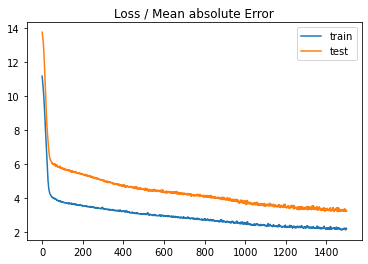

In [236]:
# # DO NOT Modify this gives 74% accuracy- LOL just kidding
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()
# # DO NOT Modify this gives 70%- actually
tf.random.set_seed(1)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
reg_model = Sequential()
reg_model.add(Dense(64, input_dim=10, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(8, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(1))
reg_model.compile(loss='mae', 
                optimizer='adam')


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=1500, verbose=1)
y_pred=reg_model.predict(X_test_std)
train_mae = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mae = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))
# plot loss during training
plt.title('Loss / Mean absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()




In [237]:
y_pred_train=reg_model.predict(X_train_std)
R2=r2_score(Y_train,y_pred_train)

In [238]:
n= len(X_train_std)
p = len(X[1])
adj_R2_train = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2_train

0.8757265543489126

In [239]:
y_pred_test=reg_model.predict(X_test_std)
R2=r2_score(Y_test,y_pred_test)

In [242]:
n= len(X_train_std)
p = len(X[1])
adj_R2_test = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2_test

0.8496418870856295

# Principal Component Analysis

In [211]:
scaler = StandardScaler()
X= scaler.fit_transform(X)


In [212]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [221]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [222]:
X_pca.shape

(219, 9)

In [223]:
PCA_df = pd.DataFrame(data = X_pca)
PCA_df.head()

,0,1,2,3,4,5,6,7,8
0,-1.933396,-1.815459,-1.149201,-0.169943,0.471828,-0.398843,-0.064216,0.064176,0.435945
1,-1.933780,-1.815191,-1.147765,-0.170004,0.473926,-0.398018,-0.064108,0.064483,0.436006
2,-1.934420,-1.814744,-1.145372,-0.170107,0.477423,-0.396643,-0.063928,0.064995,0.436107
3,-1.936979,-1.812956,-1.135800,-0.170517,0.491409,-0.391141,-0.063210,0.067044,0.436512
4,-1.942098,-1.809381,-1.116655,-0.171336,0.519382,-0.380137,-0.061773,0.071141,0.437322


In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(PCA_df, Y, test_size=0.20, random_state=101)

In [225]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

Epoch 1/2000
6/6 [==============================] - 1s 31ms/step - loss: 11.1084 - val_loss: 13.6679
Epoch 2/2000
6/6 [==============================] - 0s 6ms/step - loss: 10.9334 - val_loss: 13.5441
Epoch 3/2000
6/6 [==============================] - 0s 6ms/step - loss: 10.7851 - val_loss: 13.4245
Epoch 4/2000
6/6 [==============================] - 0s 5ms/step - loss: 10.6906 - val_loss: 13.3056
Epoch 5/2000
6/6 [==============================] - 0s 6ms/step - loss: 10.5438 - val_loss: 13.1773
Epoch 6/2000
6/6 [==============================] - 0s 6ms/step - loss: 10.3200 - val_loss: 13.0268
Epoch 7/2000
6/6 [==============================] - 0s 6ms/step - loss: 10.1505 - val_loss: 12.8464
Epoch 8/2000
6/6 [==============================] - 0s 7ms/step - loss: 9.9656 - val_loss: 12.6415
Epoch 9/2000
6/6 [==============================] - 0s 6ms/step - loss: 9.7743 - val_loss: 12.4088
Epoch 10/2000
6/6 [==============================] - 0s 6ms/step - loss: 9.4384 - val_loss: 12.1449
E

6/6 [==============================] - 0s 6ms/step - loss: 4.5756 - val_loss: 6.2648
Epoch 84/2000
6/6 [==============================] - 0s 7ms/step - loss: 4.5794 - val_loss: 6.2716
Epoch 85/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.7474 - val_loss: 6.2676
Epoch 86/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.8316 - val_loss: 6.2380
Epoch 87/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.7734 - val_loss: 6.2111
Epoch 88/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.6738 - val_loss: 6.1853
Epoch 89/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.5646 - val_loss: 6.1999
Epoch 90/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.7353 - val_loss: 6.2403
Epoch 91/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.6141 - val_loss: 6.2916
Epoch 92/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.5932 - val_loss: 6.3234
Epoch 93/2000
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 4.4140 - val_loss: 5.9564
Epoch 166/2000
6/6 [==============================] - 0s 7ms/step - loss: 4.4624 - val_loss: 5.9588
Epoch 167/2000
6/6 [==============================] - 0s 5ms/step - loss: 4.4807 - val_loss: 5.9540
Epoch 168/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1606 - val_loss: 5.9063
Epoch 169/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1857 - val_loss: 5.9028
Epoch 170/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.2306 - val_loss: 5.9013
Epoch 171/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.4825 - val_loss: 5.8747
Epoch 172/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1466 - val_loss: 5.8524
Epoch 173/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.2828 - val_loss: 5.8417
Epoch 174/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.3946 - val_loss: 5.8766
Epoch 175/2000


6/6 [==============================] - 0s 6ms/step - loss: 4.1389 - val_loss: 5.6766
Epoch 248/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.5038 - val_loss: 5.6466
Epoch 249/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0693 - val_loss: 5.6241
Epoch 250/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.5326 - val_loss: 5.6233
Epoch 251/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0033 - val_loss: 5.6477
Epoch 252/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1225 - val_loss: 5.6601
Epoch 253/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0355 - val_loss: 5.6716
Epoch 254/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1271 - val_loss: 5.7343
Epoch 255/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0774 - val_loss: 5.7121
Epoch 256/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.2590 - val_loss: 5.7004
Epoch 257/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.8290 - val_loss: 5.4981
Epoch 330/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1024 - val_loss: 5.4782
Epoch 331/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0627 - val_loss: 5.4612
Epoch 332/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9836 - val_loss: 5.4472
Epoch 333/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0061 - val_loss: 5.4535
Epoch 334/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8164 - val_loss: 5.4557
Epoch 335/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1223 - val_loss: 5.4591
Epoch 336/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1365 - val_loss: 5.4715
Epoch 337/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8937 - val_loss: 5.5112
Epoch 338/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1136 - val_loss: 5.5527
Epoch 339/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.8432 - val_loss: 5.3920
Epoch 412/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1506 - val_loss: 5.3708
Epoch 413/2000
6/6 [==============================] - 0s 5ms/step - loss: 4.0160 - val_loss: 5.3569
Epoch 414/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9067 - val_loss: 5.3846
Epoch 415/2000
6/6 [==============================] - 0s 5ms/step - loss: 4.1529 - val_loss: 5.3462
Epoch 416/2000
6/6 [==============================] - 0s 5ms/step - loss: 4.1316 - val_loss: 5.3161
Epoch 417/2000
6/6 [==============================] - 0s 5ms/step - loss: 3.9361 - val_loss: 5.3154
Epoch 418/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.4136 - val_loss: 5.3402
Epoch 419/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.2039 - val_loss: 5.3529
Epoch 420/2000
6/6 [==============================] - 0s 5ms/step - loss: 4.3221 - val_loss: 5.3215
Epoch 421/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.8336 - val_loss: 5.2676
Epoch 494/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1304 - val_loss: 5.2430
Epoch 495/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7913 - val_loss: 5.2084
Epoch 496/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9258 - val_loss: 5.1906
Epoch 497/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0584 - val_loss: 5.1951
Epoch 498/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7232 - val_loss: 5.2482
Epoch 499/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0485 - val_loss: 5.2933
Epoch 500/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1926 - val_loss: 5.2666
Epoch 501/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0479 - val_loss: 5.2497
Epoch 502/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8566 - val_loss: 5.2575
Epoch 503/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.9587 - val_loss: 5.1232
Epoch 576/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0430 - val_loss: 5.0956
Epoch 577/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0750 - val_loss: 5.0930
Epoch 578/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0410 - val_loss: 5.0645
Epoch 579/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9990 - val_loss: 5.1033
Epoch 580/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8261 - val_loss: 5.1118
Epoch 581/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9894 - val_loss: 5.0924
Epoch 582/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0094 - val_loss: 5.0745
Epoch 583/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0195 - val_loss: 5.0278
Epoch 584/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.1059 - val_loss: 5.0332
Epoch 585/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.9230 - val_loss: 4.9860
Epoch 658/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7268 - val_loss: 4.9903
Epoch 659/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6272 - val_loss: 5.0062
Epoch 660/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7985 - val_loss: 5.0166
Epoch 661/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8588 - val_loss: 5.0324
Epoch 662/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7992 - val_loss: 5.0402
Epoch 663/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9386 - val_loss: 5.0393
Epoch 664/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7044 - val_loss: 5.0675
Epoch 665/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0124 - val_loss: 5.0602
Epoch 666/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0912 - val_loss: 5.0350
Epoch 667/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.9963 - val_loss: 4.9304
Epoch 740/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0259 - val_loss: 4.8774
Epoch 741/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9166 - val_loss: 4.8081
Epoch 742/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7009 - val_loss: 4.7660
Epoch 743/2000
6/6 [==============================] - 0s 6ms/step - loss: 4.0380 - val_loss: 4.7631
Epoch 744/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8140 - val_loss: 4.8139
Epoch 745/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7569 - val_loss: 4.8719
Epoch 746/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9320 - val_loss: 4.8789
Epoch 747/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6304 - val_loss: 4.8883
Epoch 748/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7371 - val_loss: 4.9574
Epoch 749/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.7366 - val_loss: 4.8333
Epoch 822/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7932 - val_loss: 4.8951
Epoch 823/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8768 - val_loss: 4.9079
Epoch 824/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7908 - val_loss: 4.8567
Epoch 825/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6367 - val_loss: 4.7577
Epoch 826/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9836 - val_loss: 4.7336
Epoch 827/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.6274 - val_loss: 4.7349
Epoch 828/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7344 - val_loss: 4.7841
Epoch 829/2000
6/6 [==============================] - 0s 5ms/step - loss: 3.9717 - val_loss: 4.8383
Epoch 830/2000
6/6 [==============================] - 0s 5ms/step - loss: 3.4699 - val_loss: 4.8710
Epoch 831/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.7316 - val_loss: 4.6392
Epoch 904/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6489 - val_loss: 4.5920
Epoch 905/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8231 - val_loss: 4.5657
Epoch 906/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7831 - val_loss: 4.6078
Epoch 907/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2996 - val_loss: 4.6560
Epoch 908/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6286 - val_loss: 4.6552
Epoch 909/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6238 - val_loss: 4.6599
Epoch 910/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6613 - val_loss: 4.6548
Epoch 911/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5621 - val_loss: 4.6388
Epoch 912/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7209 - val_loss: 4.6264
Epoch 913/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.8212 - val_loss: 4.5729
Epoch 986/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5740 - val_loss: 4.5217
Epoch 987/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5820 - val_loss: 4.5317
Epoch 988/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8790 - val_loss: 4.5052
Epoch 989/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6565 - val_loss: 4.4637
Epoch 990/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6601 - val_loss: 4.4785
Epoch 991/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3574 - val_loss: 4.5516
Epoch 992/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3040 - val_loss: 4.5918
Epoch 993/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5614 - val_loss: 4.5716
Epoch 994/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6246 - val_loss: 4.5694
Epoch 995/2000


6/6 [==============================] - 0s 6ms/step - loss: 3.4245 - val_loss: 4.3505
Epoch 1067/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3487 - val_loss: 4.3271
Epoch 1068/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5603 - val_loss: 4.3413
Epoch 1069/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4584 - val_loss: 4.3538
Epoch 1070/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3160 - val_loss: 4.3218
Epoch 1071/2000
6/6 [==============================] - 0s 5ms/step - loss: 3.7618 - val_loss: 4.3601
Epoch 1072/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5611 - val_loss: 4.4185
Epoch 1073/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.6518 - val_loss: 4.4049
Epoch 1074/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5990 - val_loss: 4.4298
Epoch 1075/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.9072 - val_loss: 4.4215
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.5858 - val_loss: 4.2550
Epoch 1148/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5005 - val_loss: 4.2875
Epoch 1149/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7445 - val_loss: 4.3037
Epoch 1150/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7155 - val_loss: 4.3135
Epoch 1151/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.7142 - val_loss: 4.3242
Epoch 1152/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.8509 - val_loss: 4.3349
Epoch 1153/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3605 - val_loss: 4.3473
Epoch 1154/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3528 - val_loss: 4.3235
Epoch 1155/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5745 - val_loss: 4.2732
Epoch 1156/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5624 - val_loss: 4.2064
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.4290 - val_loss: 4.3916
Epoch 1229/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.3775 - val_loss: 4.3642
Epoch 1230/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2664 - val_loss: 4.3336
Epoch 1231/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3326 - val_loss: 4.3821
Epoch 1232/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4225 - val_loss: 4.3723
Epoch 1233/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3179 - val_loss: 4.3344
Epoch 1234/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5051 - val_loss: 4.3286
Epoch 1235/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4011 - val_loss: 4.3410
Epoch 1236/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3391 - val_loss: 4.3243
Epoch 1237/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4296 - val_loss: 4.2702
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.3594 - val_loss: 4.1239
Epoch 1310/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5531 - val_loss: 4.0991
Epoch 1311/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3742 - val_loss: 4.2145
Epoch 1312/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3164 - val_loss: 4.2375
Epoch 1313/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4378 - val_loss: 4.1042
Epoch 1314/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3054 - val_loss: 4.0650
Epoch 1315/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5991 - val_loss: 4.0568
Epoch 1316/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3190 - val_loss: 4.1185
Epoch 1317/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5288 - val_loss: 4.2796
Epoch 1318/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3775 - val_loss: 4.2774
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.3444 - val_loss: 4.0966
Epoch 1391/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1573 - val_loss: 4.1098
Epoch 1392/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1476 - val_loss: 4.1512
Epoch 1393/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3988 - val_loss: 4.1190
Epoch 1394/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2655 - val_loss: 4.0699
Epoch 1395/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1798 - val_loss: 4.0699
Epoch 1396/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.4688 - val_loss: 4.0589
Epoch 1397/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4049 - val_loss: 4.0822
Epoch 1398/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0727 - val_loss: 4.1119
Epoch 1399/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1369 - val_loss: 4.1040
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.4741 - val_loss: 4.0205
Epoch 1472/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3189 - val_loss: 4.0247
Epoch 1473/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4390 - val_loss: 4.0646
Epoch 1474/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2476 - val_loss: 4.1228
Epoch 1475/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.5061 - val_loss: 4.1469
Epoch 1476/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3206 - val_loss: 4.1962
Epoch 1477/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3160 - val_loss: 4.1540
Epoch 1478/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3277 - val_loss: 4.0788
Epoch 1479/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0776 - val_loss: 4.0791
Epoch 1480/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3196 - val_loss: 3.9891
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 3.2042 - val_loss: 3.9419
Epoch 1553/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2936 - val_loss: 3.9527
Epoch 1554/2000
6/6 [==============================] - 0s 7ms/step - loss: 2.8831 - val_loss: 3.9702
Epoch 1555/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.0527 - val_loss: 3.9501
Epoch 1556/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0322 - val_loss: 3.9851
Epoch 1557/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4435 - val_loss: 3.9851
Epoch 1558/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2679 - val_loss: 3.9641
Epoch 1559/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1835 - val_loss: 4.1190
Epoch 1560/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3697 - val_loss: 3.9946
Epoch 1561/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2104 - val_loss: 3.8614
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 3.2942 - val_loss: 3.8340
Epoch 1634/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2062 - val_loss: 3.8316
Epoch 1635/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0680 - val_loss: 3.8493
Epoch 1636/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1806 - val_loss: 3.8535
Epoch 1637/2000
6/6 [==============================] - 0s 7ms/step - loss: 2.9746 - val_loss: 3.8604
Epoch 1638/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2705 - val_loss: 3.8497
Epoch 1639/2000
6/6 [==============================] - 0s 7ms/step - loss: 2.9686 - val_loss: 3.7521
Epoch 1640/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.3101 - val_loss: 3.6949
Epoch 1641/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.1003 - val_loss: 3.7793
Epoch 1642/2000
6/6 [==============================] - 0s 8ms/step - loss: 3.2513 - val_loss: 3.8024
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.0800 - val_loss: 3.6670
Epoch 1715/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.8268 - val_loss: 3.7054
Epoch 1716/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0722 - val_loss: 3.7771
Epoch 1717/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1982 - val_loss: 3.7066
Epoch 1718/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0474 - val_loss: 3.7337
Epoch 1719/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0963 - val_loss: 3.8192
Epoch 1720/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3109 - val_loss: 3.8581
Epoch 1721/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.9718 - val_loss: 3.7618
Epoch 1722/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.9725 - val_loss: 3.6971
Epoch 1723/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1110 - val_loss: 3.6276
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.2842 - val_loss: 3.9201
Epoch 1796/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2377 - val_loss: 3.7968
Epoch 1797/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.9809 - val_loss: 3.6320
Epoch 1798/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.8454 - val_loss: 3.4755
Epoch 1799/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1111 - val_loss: 3.5448
Epoch 1800/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1183 - val_loss: 3.7687
Epoch 1801/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2908 - val_loss: 3.8396
Epoch 1802/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1654 - val_loss: 3.8066
Epoch 1803/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0694 - val_loss: 3.8212
Epoch 1804/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3521 - val_loss: 3.8043
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.3171 - val_loss: 3.6691
Epoch 1877/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0280 - val_loss: 3.8036
Epoch 1878/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2225 - val_loss: 3.8804
Epoch 1879/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0552 - val_loss: 3.8201
Epoch 1880/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.0275 - val_loss: 3.7892
Epoch 1881/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.9781 - val_loss: 3.8172
Epoch 1882/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.3762 - val_loss: 3.8538
Epoch 1883/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.8937 - val_loss: 3.6878
Epoch 1884/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1702 - val_loss: 3.6222
Epoch 1885/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0787 - val_loss: 3.6155
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 3.0072 - val_loss: 3.4107
Epoch 1958/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.9818 - val_loss: 3.3769
Epoch 1959/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1854 - val_loss: 3.4101
Epoch 1960/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2035 - val_loss: 3.4821
Epoch 1961/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.0666 - val_loss: 3.5111
Epoch 1962/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.1498 - val_loss: 3.4948
Epoch 1963/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.2074 - val_loss: 3.6205
Epoch 1964/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.2671 - val_loss: 3.6240
Epoch 1965/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.9601 - val_loss: 3.5466
Epoch 1966/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.0193 - val_loss: 3.5202
Epoch 

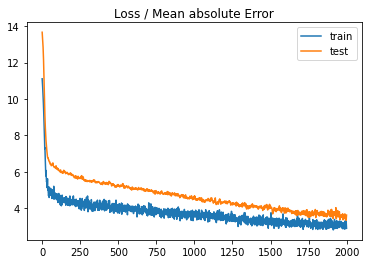

In [226]:
tf.random.set_seed(1)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
reg_model = Sequential()
reg_model.add(Dense(64, input_dim=9, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(8, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='adam')


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=2000, verbose=1)
y_pred=reg_model.predict(X_test)
train_mae = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mae = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))
# plot loss during training
plt.title('Loss / Mean absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [227]:
R2=r2_score(Y_test,y_pred)

In [229]:
n= len(X_train)
p = len(X[1])
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2

0.7738408272865578

# AutoEncoder - standard scaler

In [74]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
# X = sc.fit_transform(X)


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [84]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(5, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='relu')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='sgd', loss='mse')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                shuffle=True,
                verbose = 1,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = autoencoder.predict(X)


Epoch 1/100
5/5 [==============================] - 1s 65ms/step - loss: 0.1822 - val_loss: 0.1735
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1807 - val_loss: 0.1722
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1793 - val_loss: 0.1709
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1780 - val_loss: 0.1697
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1767 - val_loss: 0.1685
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1754 - val_loss: 0.1673
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1741 - val_loss: 0.1662
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1729 - val_loss: 0.1650
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1716 - val_loss: 0.1639
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1704 - val_loss: 0.1627
Epoch 11/100
5/5 [=

Epoch 84/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1322 - val_loss: 0.1253
Epoch 85/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1321 - val_loss: 0.1252
Epoch 86/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1319 - val_loss: 0.1251
Epoch 87/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1318 - val_loss: 0.1249
Epoch 88/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1317 - val_loss: 0.1248
Epoch 89/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1315 - val_loss: 0.1247
Epoch 90/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1314 - val_loss: 0.1245
Epoch 91/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1313 - val_loss: 0.1244
Epoch 92/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1312 - val_loss: 0.1243
Epoch 93/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1311 - val_loss: 0.1242
Epoch 94/1

In [85]:
X_ae.shape

(219, 10)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ae, Y, test_size=0.20, random_state=101)

Epoch 1/100
6/6 [==============================] - 1s 65ms/step - loss: 10.8166 - val_loss: 13.4875
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 10.7882 - val_loss: 13.3525
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 10.5842 - val_loss: 13.1071
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 10.2828 - val_loss: 12.8432
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 9.9651 - val_loss: 12.5598
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 9.6803 - val_loss: 12.2813
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 9.4431 - val_loss: 12.0159
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 9.2638 - val_loss: 11.7403
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 9.0983 - val_loss: 11.4425
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 8.9116 - val_loss: 11.1530
Epoch

6/6 [==============================] - 0s 12ms/step - loss: 7.7042 - val_loss: 9.7784
Epoch 84/100
6/6 [==============================] - 0s 12ms/step - loss: 7.6560 - val_loss: 9.3018
Epoch 85/100
6/6 [==============================] - 0s 13ms/step - loss: 7.6006 - val_loss: 9.3167
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 7.8951 - val_loss: 9.4552
Epoch 87/100
6/6 [==============================] - 0s 11ms/step - loss: 7.4615 - val_loss: 9.1452
Epoch 88/100
6/6 [==============================] - 0s 11ms/step - loss: 7.8502 - val_loss: 9.2413
Epoch 89/100
6/6 [==============================] - 0s 12ms/step - loss: 7.3274 - val_loss: 8.9869
Epoch 90/100
6/6 [==============================] - 0s 13ms/step - loss: 7.4917 - val_loss: 9.5533
Epoch 91/100
6/6 [==============================] - 0s 12ms/step - loss: 7.1799 - val_loss: 9.0268
Epoch 92/100
6/6 [==============================] - 0s 15ms/step - loss: 8.3275 - val_loss: 8.9560
Epoch 93/100
6/6 [=====

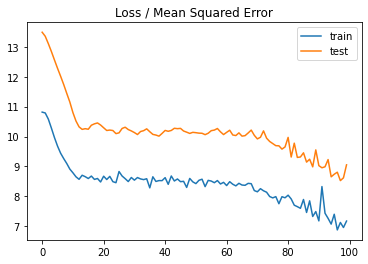

In [106]:
tf.random.set_seed(1)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
reg_model = Sequential()
reg_model.add(Dense(64, input_dim=10, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(8, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='adam')


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=1500, verbose=1)
y_pred=reg_model.predict(X_test_std)
train_mae = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mae = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))
# plot loss during training
plt.title('Loss / Mean absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()




In [107]:
R2=r2_score(Y_test,y_pred)

In [108]:
n= len(X_train)
p = len(X[1])
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2

-0.1690856401389571

# Stacked AutoEncoder

In [226]:
from keras import regularizers
batch_size = 32
input_dim = X_train[0].shape[0] #num of predictor variables 
learning_rate = 1e-4
input_layer = Input(shape=(input_dim, ), name="input")
#Input Layer
encoder = Dense (100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#Encoder’s first dense layer
encoder = Dense (50, activation="relu",
activity_regularizer=regularizers.l1(learning_rate))(encoder)
#Encoder’s second dense layer
encoder = Dense (25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Code layer
encoder = Dense (8, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s first dense layer
decoder = Dense(25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s second dense layer
decoder = Dense(50, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Decoder’s Third dense layer
decoder = Dense(100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Output Layer
decoder = Dense(input_dim, activation="sigmoid", activity_regularizer=regularizers.l1(learning_rate))(decoder)

In [227]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_1 = autoencoder_1.fit(X_train, X_train,epochs=200,batch_size=batch_size)


Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 1.2595 - accuracy: 0.1257
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 1.2302 - accuracy: 0.2286
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 1.1804 - accuracy: 0.2286
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 1.1124 - accuracy: 0.2286
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0687 - accuracy: 0.2286
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.2286
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9987 - accuracy: 0.2457
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.2686
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9226 - accuracy: 0.2971
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.3657
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5429
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5600
Epoch 169/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5486
Epoch 170/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7038 - accuracy: 0.5429
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5657
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5886
Epoch 173/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5486
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5543
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5429
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.5543
Epoch 177/200
6/6 [=====

In [229]:
autoencoder_2_input = autoencoder_1.predict(X_train)
autoencoder_2_input = np.concatenate((autoencoder_2_input , X_train))


In [230]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_2 = autoencoder_2.fit(autoencoder_2_input, autoencoder_2_input,epochs=100,batch_size=batch_size)


Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.6371
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.7514
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.6686
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.7000
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.7200
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.7314
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.7057
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.7429
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7486
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.7371
Epoch 11/

11/11 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.7514
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.7600
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.7486
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.7629
Epoch 87/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7429
Epoch 88/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.7600
Epoch 89/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7657
Epoch 90/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.7571
Epoch 91/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7629
Epoch 92/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7486
Epoch 93/100


In [231]:
autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))


In [232]:
autoencoder_3 = Model(inputs=input_layer, outputs=decoder)
autoencoder_3.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
satck_3 = autoencoder_3.fit(autoencoder_3_input, autoencoder_3_input, epochs=50, batch_size=16)

Epoch 1/50
44/44 [==============================] - 1s 1ms/step - loss: 0.1772 - accuracy: 0.8429
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.8486
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8429
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.83 - 0s 1ms/step - loss: 0.1769 - accuracy: 0.8400
Epoch 5/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8514
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.8386
Epoch 7/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.8400
Epoch 8/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8357
Epoch 9/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8286
Epoch 10/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1

In [233]:
encoded = Model(input_layer, encoder)
X_ae1 = encoded.predict(X)
X_ae1.shape

(219, 8)

In [234]:
AEC_df = pd.DataFrame(data = X_ae1)
AEC_df.head()

,0,1,2,3,4,5,6,7
0,0.0,1.318800,1.074501,0.925603,0.060879,0.445664,1.522639,0.0
1,0.0,1.319359,1.074960,0.925644,0.060706,0.445611,1.522937,0.0
2,0.0,1.320340,1.075920,0.925472,0.060442,0.445836,1.523598,0.0
3,0.0,1.324142,1.079639,0.924848,0.059435,0.446809,1.526168,0.0
4,0.0,1.328306,1.083765,0.925408,0.058882,0.450805,1.529232,0.0


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(AEC_df, Y, test_size=0.20, random_state=101)

Epoch 1/200
6/6 [==============================] - 0s 18ms/step - loss: 10.6264 - val_loss: 13.2338
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 10.5360 - val_loss: 13.1645
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 10.4580 - val_loss: 13.0987
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 10.3793 - val_loss: 13.0307
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 10.2989 - val_loss: 12.9637
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 10.2186 - val_loss: 12.8912
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 10.1326 - val_loss: 12.8123
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 10.0392 - val_loss: 12.7254
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 9.9429 - val_loss: 12.6371
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 9.8498 - val_loss: 12.5520
Epoch 11/2

6/6 [==============================] - 0s 4ms/step - loss: 7.8072 - val_loss: 9.4974
Epoch 85/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7874 - val_loss: 9.5181
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7803 - val_loss: 9.5443
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7613 - val_loss: 9.5030
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7430 - val_loss: 9.4796
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7341 - val_loss: 9.4576
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7170 - val_loss: 9.4270
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7047 - val_loss: 9.4016
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 7.6864 - val_loss: 9.3624
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 7.6852 - val_loss: 9.3497
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 6.6022 - val_loss: 8.7593
Epoch 168/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5995 - val_loss: 8.7607
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5958 - val_loss: 8.7645
Epoch 170/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5825 - val_loss: 8.7629
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5866 - val_loss: 8.7656
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5981 - val_loss: 8.7535
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5891 - val_loss: 8.7364
Epoch 174/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5753 - val_loss: 8.7253
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5519 - val_loss: 8.7179
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5596 - val_loss: 8.7204
Epoch 177/200
6/6 [=====

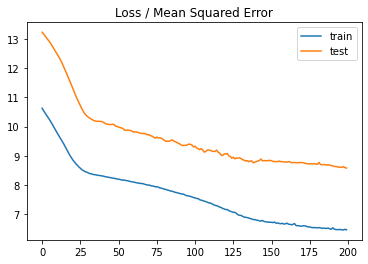

In [238]:
tf.random.set_seed(1)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
reg_model = Sequential()
reg_model.add(Dense(64, input_dim=10, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(8, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='adam')


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=1500, verbose=1)
y_pred=reg_model.predict(X_test_std)
train_mae = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mae = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))
# plot loss during training
plt.title('Loss / Mean absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [239]:
r2_score(Y_test,y_preds)**0.5

nan

# Independent component analysis

In [114]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
X_ica = pd.DataFrame(data = X_ica)


In [115]:
X_ica.head()

,0,1,2,3,4,5,6,7
0,0.020283,-0.022781,0.017370,-0.038583,-0.108172,-0.041023,-0.093598,-0.011073
1,0.020285,-0.022597,0.017342,-0.038582,-0.108187,-0.040975,-0.093622,-0.011098
2,0.020289,-0.022290,0.017297,-0.038580,-0.108213,-0.040894,-0.093661,-0.011139
3,0.020303,-0.021062,0.017116,-0.038572,-0.108315,-0.040571,-0.093819,-0.011306
4,0.020330,-0.018608,0.016753,-0.038556,-0.108520,-0.039925,-0.094134,-0.011638


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ica, Y, test_size=0.20, random_state=101)

Epoch 1/100
6/6 [==============================] - 1s 67ms/step - loss: 10.7883 - val_loss: 13.2048
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 10.3257 - val_loss: 12.7186
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 9.7685 - val_loss: 12.1164
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 9.3866 - val_loss: 11.5080
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 9.0628 - val_loss: 11.0104
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 8.7313 - val_loss: 10.6259
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 8.8943 - val_loss: 10.4057
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 8.6909 - val_loss: 10.3392
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 8.6909 - val_loss: 10.2952
Epoch 10/100
6/6 [==============================] - 0s 12ms/step - loss: 8.6639 - val_loss: 10.3796
Epoch 1

6/6 [==============================] - 0s 12ms/step - loss: 7.9438 - val_loss: 9.9268
Epoch 84/100
6/6 [==============================] - 0s 13ms/step - loss: 8.0385 - val_loss: 9.8188
Epoch 85/100
6/6 [==============================] - 0s 11ms/step - loss: 7.8875 - val_loss: 9.8163
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 7.7502 - val_loss: 9.8048
Epoch 87/100
6/6 [==============================] - 0s 12ms/step - loss: 7.8159 - val_loss: 10.0285
Epoch 88/100
6/6 [==============================] - 0s 13ms/step - loss: 7.8535 - val_loss: 9.7909
Epoch 89/100
6/6 [==============================] - 0s 11ms/step - loss: 7.8312 - val_loss: 9.8070
Epoch 90/100
6/6 [==============================] - 0s 12ms/step - loss: 7.5826 - val_loss: 10.0192
Epoch 91/100
6/6 [==============================] - 0s 11ms/step - loss: 7.9866 - val_loss: 9.8414
Epoch 92/100
6/6 [==============================] - 0s 11ms/step - loss: 7.9026 - val_loss: 9.7480
Epoch 93/100
6/6 [===

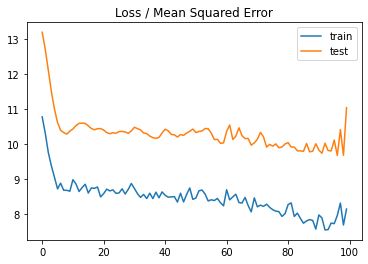

In [113]:
tf.random.set_seed(1)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
reg_model = Sequential()
reg_model.add(Dense(64, input_dim=10, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.1))
reg_model.add(Dense(8, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='adam')


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=1500, verbose=1)
y_pred=reg_model.predict(X_test_std)
train_mae = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mae = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))
# plot loss during training
plt.title('Loss / Mean absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

